# State Management

## State Management

### 개요

**state management** 상태 관리

vue component는 이미 반응형 상태를 관리하고 있음. 상태 === 데이터

**컴포넌트 구조의 단순화**

뷰는 컴포넌트 구조를 아래 세가지로 단순화시킴

상태(state) - 앱 구동에 필요한 기본 데이터

뷰(view) - 상태를 선언적으로 매핑하여 시각화

기능(action) - 뷰에서 사용자 입력에 대해 반응적으로 상태를 변경할 수 있게 정의된 동작

단방향 데이터 흐름의 간단한 표현-->

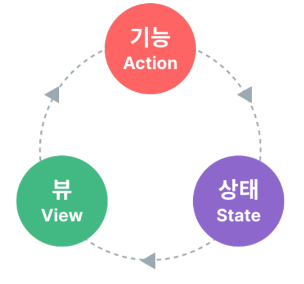

**상태 관리의 단순성이 무너지는 시점**

- 여러 컴포넌트가 상태를 공유할 때.
  
    1. 여러 뷰가 동일한 상태에 종속되는 경우.
        (공유 상태를 공통 조상 컴포넌트를 끌어올린 다음 또 끝까지 전달해줘야 함. 깊을수록 비효율)

    2. 서로 다른 뷰의 기능이 동일한 상태를 변경시켜야 하는 경우. 
        (emit 된 이벤트를 통해 상태의 여러 복사본을 변경 및 동기화해야 할 때.)


--> 각 컴포넌트의 공유 상태를 추출해 전역에서 참조할 수 있는 저장소에서 관리.

    컴포넌트 트리는 하나의 큰 뷰가 되고 모든 컴포넌트는 트리 계층 구조에 관계 없이 상태에 접근하거나 기능을 사용할 수 있음.

    vue의 공식 상태 관리 라이브러리 === Pinia




## State Management Library (Pinia)

### Pinia

vue 공식 상태 관리 라이브러리

https://pinia.vuejs.org/

**pinia 구성요소**

- store, state, getters, actions, plugin

**store**

- 중앙 저장소. 모든 컴포넌트가 공유하는 상태, 기능 등이 작성됨.

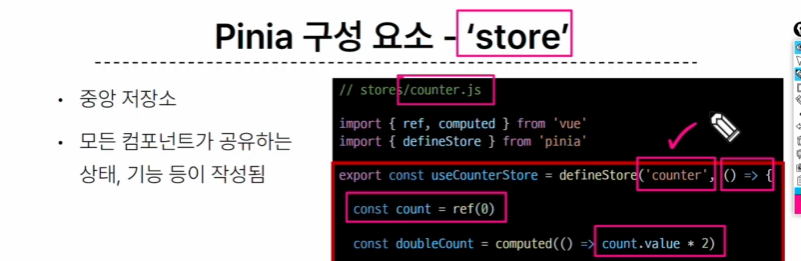

저장소 이름 변경 가능.

**state**

- 반응형 상태(데이터) ref()===state

ref로 만든 것들-- 상태. state

**getters**

- 계산된 값. computed() === getters

computed로 만든 것들-- getters

**actions**

- 메서드. function() === actions

method는 actions 라 부른다.

**plugin**

- 애플리케이션의 상태 관리에 필요한 추가 기능을 제공하거나 확장하는 도구나 모듈. 

- 애플리케이션의 상태 관리를 더욱 간편하고 유연하게 만들어주며 패키지 매니저로 설치 이후 별도 설정을 통해 추가됨.


-- pinia는 store라는 저장소를 가짐. store는 state, getters, actions로 이루어지며 각각 ref, computed, function과 동일.


In [ ]:
// stores/ counter.js

import { ref, computed } from 'vue'
import { defineStore } from 'pinia'

// pinia의 중앙저장소
// component에 종속되어있지 않음
// 계층 구조에 상관없이 접근해서 사용 가능.
export const useCounterStore = defineStore('counter', () => {
  // 상태
  const count = ref(0)
  const doubleCount = computed(() => count.value * 2)

  //기능
  function increment() {
    count.value++
  }


  return { count, doubleCount, increment }
})

### pinia 구성 요소 활용

**state**

store 인스턴스로 state에 접근하여 직접 읽고 쓸 수 있음.

만약 store에 state를 정의하지 않았다면 컴포넌트에서 새로 추가할 수 없음 (아래 예시 코드)

**getters**

store의 모든 getters를 state 처럼 직접 접근할 수 있음

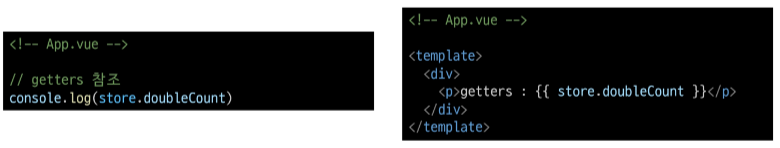

**actions**

store의 모든 actions를 직접 접근 및 호출 할 수 있음.

getters와 달리 state 조작, 비동기, API 호출이나 다른 로직을 진행할 수 있음



In [ ]:
<!-- App.vue  -->

<template>
  <div>

    <p> {{ store.count }} </p>
    <p> {{ newNumber }} </p>
    <p> {{ store.doubleCount }} </p>
    <!-- 버튼을 누르면 action을 호출. 중앙 저장소의 상태가 변하므로 중앙저장소의 데이터를 갖다 쓰는 위의 요소들도 함께 바뀜(동기화) -->
    <button @click="store.increment()">버튼</button>
  </div> 

</template>

<script setup>
import { useCounterStore } from "@/stores/counter"

const store = useCounterStore()

console.log(store.count)

// const store.count = 100 // error

// store.count = 100 // 변경됨. 중앙저장소의 변수에 접근이 가능하다면 변경 자체는 가능하다.
// 하지만 특정 컴포넌트가 중앙저장소의 변수의 값을 바꿔버리면 혼란이 올 수 있음.
// getters나 actions를 활용하도록.

const newNumber = store.count + 1 

// 만약 store에 state를 정의하지 않았다면 컴포넌트에서 새로 추가할 수 없음
// store.ssafy = 100 // 중앙저장소에 없는 요소를 컴포넌트에서 추가 불가능하다.

console.log(store.doubleCount)

</script>


<style scoped>

</style>


<!--  store/counter.js -->

import { ref, computed } from 'vue'
import { defineStore } from 'pinia'

// pinia의 중앙저장소
// component에 종속되어있지 않음
// 계층 구조에 상관없이 접근해서 사용 가능.
export const useCounterStore = defineStore('counter', () => {
  // 상태
  const count = ref(100)
  const doubleCount = computed(() => count.value * 2)

  //기능
  function increment() {
    count.value++
  }


  return { count, doubleCount, increment }
})


## Pinia 실습

https://prazdevs.github.io/pinia-plugin-persistedstate/guide/

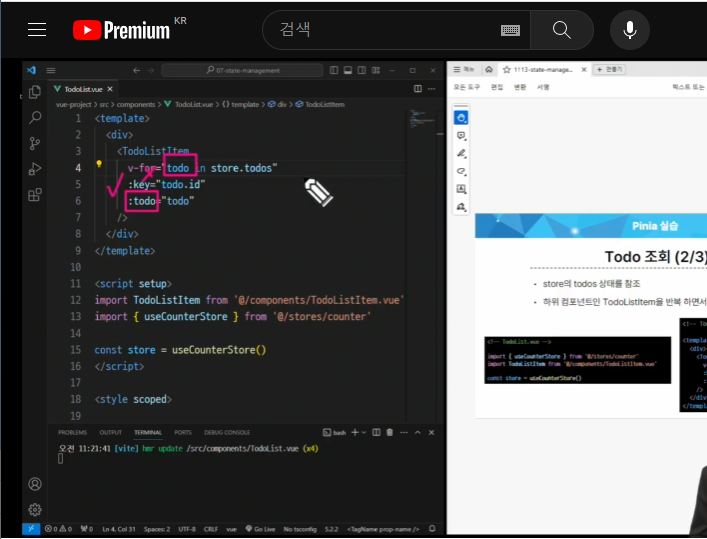

둘은 다름

--아래 live 코드. 교재 참고

In [ ]:
// src/main.js

import piniaPluginPersistedstate from "pinia-plugin-persistedstate"
import { createApp } from 'vue'
import { createPinia } from 'pinia'
import App from './App.vue'

const pinia = createPinia()
const app = createApp(App)


pinia.use(piniaPluginPersistedstate)
// app.use(createPinia())
app.use(pinia)


app.mount('#app')


In [ ]:
// src/stores/counter.js

import { ref, computed } from 'vue'
import { defineStore } from 'pinia'


export const useCounterStore = defineStore('counter', () => {
  let id = 0
  const todos = ref([
    { id: id++, text:"todo1", isDone:false},
    { id: id++, text:"todo2", isDone:false},
  ])

  const addTodo = function (todoText) {
    todos.value.push({
      id: id++,
      // 사용자 입력을 받을 곳--TodoForm.vue
      text: todoText,
      isDone: false
    })
  }
  
  const deleteTodo = function (todoId){
    // todos 배열에서 몇 번째 인덱스가 삭제되었는지 검색
    // index값을 찾아야 함. findIndex 또는 forEach로 비교.
    const index = todos.value.findIndex((todo)=> todo.id === todoId)
    // 찾은 인덱스값을 통해 배열에서 요소를 제거 후 원본 배열 업데이트-splice 사용
    todos.value.splice(index, 1)
  }

  const updateTodo = function (todoId){
    //isDone의 속성을 바꾸는 함수
    todos.value = todos.value.map((todo)=> {
      if (todo.id === todoId) {
        todo.isDone = !todo.isDone
      }
      return todo
    })
  } 

  const doneTodosCount = computed(() =>{
    return todos.value.filter((todo)=>todo.isDone).length

  })
  return { todos, addTodo, deleteTodo, updateTodo, doneTodosCount }
}, {persist:true}) 


In [ ]:
<!-- TodoForm.vue -->

<template>
    <div>
        <!-- 동기화 되는 문제를 해결하기 위해서 createTodo(todoText) -->
        <form  @submit.prevent="createTodo()" >
            <input type="text" v-model="todoText">
            <input type="submit">
        </form>
    </div>
</template>

<script setup>
import { useCounterStore } from "@/stores/counter";
import { storeToRefs } from "pinia";
import { ref } from "vue"

const todoText = ref("")
const store = useCounterStore()

const createTodo = function () {
    // addTodo 호출 시 사용자 입력 데이터 필요(text)
    // 함수 인자로 넣어주거나 양방향 바인딩 데이터 사용
    store.addTodo(todoText.value)
    //value값을 넣지 않으면 ref 객체가 들어가 반응형으로 모두 동기화가 된 값으로 갱신됨.
    todoText.value = ""
    // 2. form이나 input값을 직접 선택해서 빈 문자열로 바꾸는 방법- 교재- ref로 DOM 직접 조작. 단 ref="이름"과 const "이름" 일치시켜야 함.
}

</script>

<style scoped>

</style>

In [ ]:
<!-- TodoList.vue -->

<template>
    <div>
        <TodolistItem 
        v-for="todo in store.todos"
        :key="todo.id"
        :todo-data="todo"/>
    </div>
</template>

<script setup>
import TodolistItem from "@/components/TodoListItem.vue"
import { useCounterStore } from "@/stores/counter";

const store = useCounterStore()


</script>

<style scoped>

</style>

In [ ]:
<!-- TodoListItem.vue -->

<template>
    <div>
        <span @click="store.updateTodo(todoData.id)"
        :class="{isDone : todoData.isDone}">{{ todoData.text }}</span>
        <!-- 호출된 것에 대한 정보를 전달하기 위해 id 같이 전달. -->
        <button @click="store.deleteTodo(todoData.id)">del</button>
    </div>
</template>

<script setup>
import { useCounterStore } from '@/stores/counter';

const store = useCounterStore()

defineProps({
    todoData: Object
})


</script>

<style scoped>
.isDone {
    text-decoration: line-through;
}

</style>